# CLOUD STIM GEN

In [140]:
import sys
sys.path.insert(0, '/Users/dbutts/Code/') 

import numpy as np
from numpy.random import normal as randn 
import matplotlib.pyplot as plt  

from NDNT.utils.DanUtils import ss
from NDNT.utils.DanUtils import imagesc

In [141]:
L = 60
num_clrs = 3

NT = 100
rad1 = 6

In [171]:
def generate_cloud_stim( NT=1, L=60, scale=6, num_clrs=1, seed=None ):
    """
    Generates cloud stimulus by filtering Gaussian around origin
    scale gives rough pixel-scale of features of cloud by affecting low-pass radius
    """
    from numpy.random import normal as randn 
    # import numpy as np  # probably already imported numpy -- here it is np
    if seed is not None:
        np.random.seed(seed)
        
    LPrad = L/(2*np.pi*scale)
    
    noise = randn(size=[NT,num_clrs,L,L])
    stim4x = np.tile(noise,[1,1,2,2])  # double dims of stimulus to allow repeating (no edges with tile)

    # Make 2-d mask for Gaussian
    xs = np.arange(L*2)-L
    r2s = (xs[:,None]**2)@np.ones([1,2*L]) + np.ones([2*L,1])@(xs[None,:]**2)
    mask1 = np.exp(-r2s/(8*LPrad**2))  # takes into account that lowest freq is now twice as big
    mask1 = mask1/np.max(mask1)

    # Convert into filter fft space
    mask2 = np.fft.ifftshift(mask1, axes=[0,1])
    
    noisefft = np.fft.fft2(stim4x) # by default this does the last 2 axes
    filtered = noisefft * mask2[None,None,:,:]
    cloud = np.real(np.fft.ifft2(filtered)[:,:,range(L//2,3*L//2),:][:,:,:,range(L//2,3*L//2)])
    cloud = cloud/np.std(cloud)
    return cloud.squeeze()

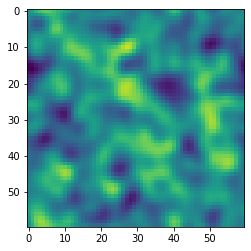

In [176]:
cloud1 = generate_cloud_stim(NT=100, scale=2, seed=10)
imagesc(cloud1[0,...])

In [71]:
noise = randn(size=[NT,num_clrs,L,L])
noise.shape
# Make GWN continuously tile-able
#stim2x = np.concatenate( (noise, noise), axis=3)
#stim4x = np.concatenate( (stim2x, stim2x), axis=2)
stim4x = np.tile(noise,[1,1,2,2])
stim4x.shape

(100, 3, 120, 120)

In [73]:
# Gassian Mask starting at zero freq -- 
xs = np.arange(L*2)-L
r2s = (xs[:,None]**2)@np.ones([1,2*L]) + np.ones([2*L,1])@(xs[None,:]**2)
mask1 = np.exp(-r2s/(8*rad1**2))  # takes into account that lowest freq is now twice as big
mask1 = mask1/np.max(mask1)
# Rearrange to handle freq organization
mask2 = np.roll(mask1,-L,axis=[0,1])

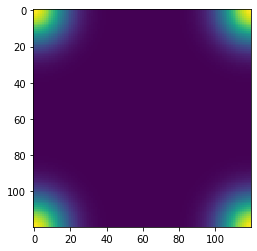

In [74]:
imagesc(mask2)

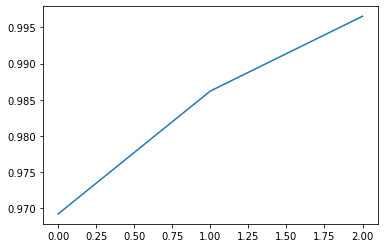

In [77]:
plt.plot(mask2[-3:,0])

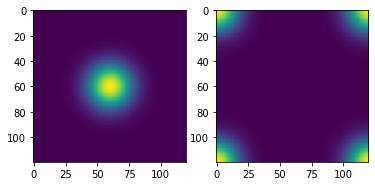

In [125]:
# Make 2-d mask for Gaussian
xs = np.arange(L*2)-L
r2s = (xs[:,None]**2)@np.ones([1,2*L]) + np.ones([2*L,1])@(xs[None,:]**2)
mask1 = np.exp(-r2s/(8*rad1**2))  # takes into account that lowest freq is now twice as big
mask1 = mask1/np.max(mask1)
#imagesc(r2s)#rad1 = 2*L/pi/spatial_scale;
plt.subplot(121)
imagesc(mask1)#rad1 = 2*L/pi/spatial_scale;
mask2 = np.fft.ifftshift(mask1,axes=[0,1])
plt.subplot(122)
imagesc(mask2)#rad1 = 2*L/pi/spatial_scale;
plt.show()

In [132]:
noisefft = np.fft.fft2(stim4x) # by default this does the last 2 axes
filtered = noisefft * mask2[None,None,:,:]
cloud = np.real(np.fft.ifft2(filtered)[:,:,range(L//2,3*L//2),:][:,:,:,range(L//2,3*L//2)])
cloud.shape

(100, 3, 60, 60)

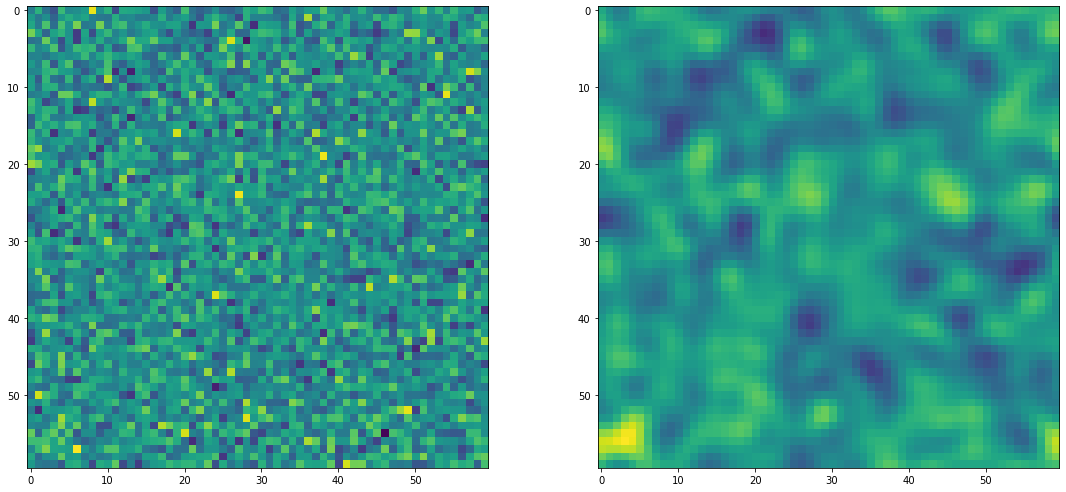

In [133]:
tt=1
ss(1,2,rh=7)
plt.subplot(121)
imagesc(stim4x[tt,0,range(L//2,3*L//2),:][:,range(L//2,3*L//2)])
plt.subplot(122)
imagesc(cloud[tt,0,...])
plt.show()

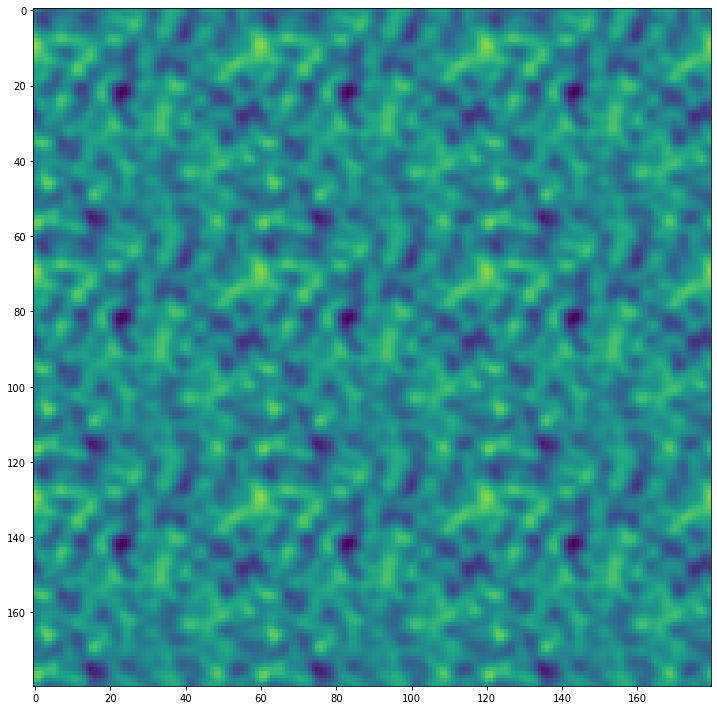

In [139]:
ss(rh=10)
imagesc(np.tile(cloud[3,0,:,:],[3,3]))

In [17]:
for cc = 1:3
    for tt in range(NT):
        
	    manip1 = fftshift(fft2(im1)); 
	    manip2 = mask1.*manip1;
	    im2 = (ifft2(ifftshift(manip2),'symmetric'));
	    stim(:,:,k,cc) = im2(1:stimw,1:stimh)./max(abs(im2(:)));
    end
end



38.72983346207417

In [21]:
mask1.shape

(60, 60)